In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [ ]:
df1=pd.read_csv('Train_Inpatientdata.csv')
df1.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2=pd.read_csv('Train.csv')
df2.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [ ]:
df = pd.merge(df1, df2)
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE156181,CLM57017,2009-06-24,2009-07-01,PRV55706,12000,PHY319644,PHY319644,PHY403799,2009-06-24,...,1985,0414,NaN,9955.0,NaN,NaN,NaN,NaN,NaN,No
40470,BENE156872,CLM67045,2009-09-06,2009-09-13,PRV51572,5000,PHY407588,PHY311768,PHY311768,2009-09-06,...,41401,2639,NaN,3326.0,NaN,NaN,NaN,NaN,NaN,No
40471,BENE157414,CLM76036,2009-11-15,2009-11-23,PRV55688,14000,PHY409302,NaN,NaN,2009-11-15,...,V0481,2761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
40472,BENE158281,CLM35143,2009-01-23,2009-01-23,PRV56485,10000,PHY367360,PHY367360,NaN,2009-01-23,...,2866,NaN,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,No


In [ ]:
source = 'Provider'
target = 'AttendingPhysician'

G = nx.from_pandas_edgelist(df, source=source, target = target,create_using=nx.Graph())

In [ ]:
nodes_info_dict = {
  'closeness_centrality': nx.closeness_centrality,
  'eigenvector_centrality': nx.eigenvector_centrality_numpy,
  'pagerank': nx.pagerank
}

columns_with_node_infos = ['degree'] + list(nodes_info_dict.keys())

nodes_info = pd.DataFrame.from_dict(dict(nx.degree(G)), orient='index').rename(columns = {0 : 'degree'}).reset_index()

for info, fun in nodes_info_dict.items():
    temp = pd.DataFrame.from_dict(fun(G), orient='index').rename(columns = {0 : info}).reset_index()
    nodes_info = nodes_info.merge(temp, on='index')
    
nodes_info = nodes_info.rename(columns = {'index': 'Physician'})

df_enriched = df[['Provider','PotentialFraud', 'AttendingPhysician']].merge(nodes_info, left_on = 'Provider',  
                           right_on='Physician', how='left').drop('Physician', axis=1)
df_enriched.rename(columns = {k:'Provider_'+k for k in columns_with_node_infos}, inplace = True)

df_enriched = df_enriched.merge(nodes_info, left_on = 'AttendingPhysician', 
                           right_on='Physician', how='left').drop('Physician', axis=1)
df_enriched.rename(columns = {k:'AttendingPhysician_'+k for k in columns_with_node_infos}, inplace = True)


In [ ]:
df_enriched.head()

,Provider,PotentialFraud,AttendingPhysician,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,PRV55912,Yes,PHY390922,37,0.002702,-4.604125e-18,0.001291,1,0.001369,1.079318e-19,0.00004
1,PRV55912,Yes,PHY349293,37,0.002702,-4.604125e-18,0.001291,1,0.001369,-5.627025e-19,0.00004
2,PRV55912,Yes,PHY334706,37,0.002702,-4.604125e-18,0.001291,1,0.001369,-5.428053e-20,0.00004
3,PRV55912,Yes,PHY390614,37,0.002702,-4.604125e-18,0.001291,1,0.001369,-5.130311e-19,0.00004
4,PRV55912,Yes,PHY380413,37,0.002702,-4.604125e-18,0.001291,1,0.001369,1.896634e-19,0.00004


In [ ]:
# Provider=df_enriched["Provider"].tolist()
# AttendingPhysician=df_enriched['AttendingPhysician'].tolist()

# source=df_enriched['Provider']
# target=df_enriched['AttendingPhysician']


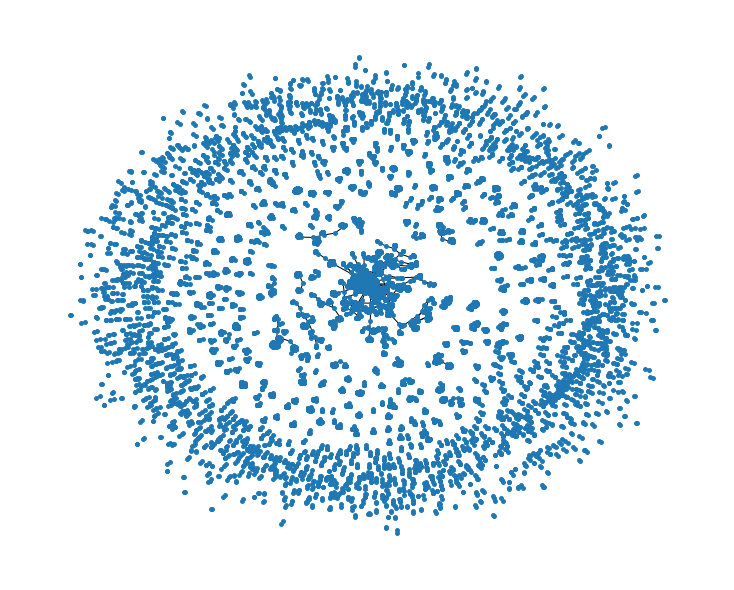

In [ ]:
from matplotlib.pyplot import figure
G = nx.from_pandas_edgelist(df_enriched,source='Provider',target ='AttendingPhysician',create_using=nx.Graph())
figure(figsize=(10, 8))
nx.draw(G, with_labels=False, font_weight='bold', node_size=15, font_size=8)

In [ ]:
# import plotly.graph_objs as go
# edge_trace=df_enriched.Provider
# node_trace=df_enriched.AttendingPhysician
# fig = go.Figure(data=[edge_trace, node_trace],
#              layout=go.Layout(
#                 title='<br>Network graph',
#                 titlefont_size=16,
#                 showlegend=False,
#                 hovermode='closest',
#                 margin=dict(b=20,l=5,r=5,t=40),
#                 annotations=[ dict(
#                     showarrow=False,
#                     xref="paper", yref="paper",
#                     x=0.005, y=-0.002 ) ],
#                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
#                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
# #                 )
# fig.show()

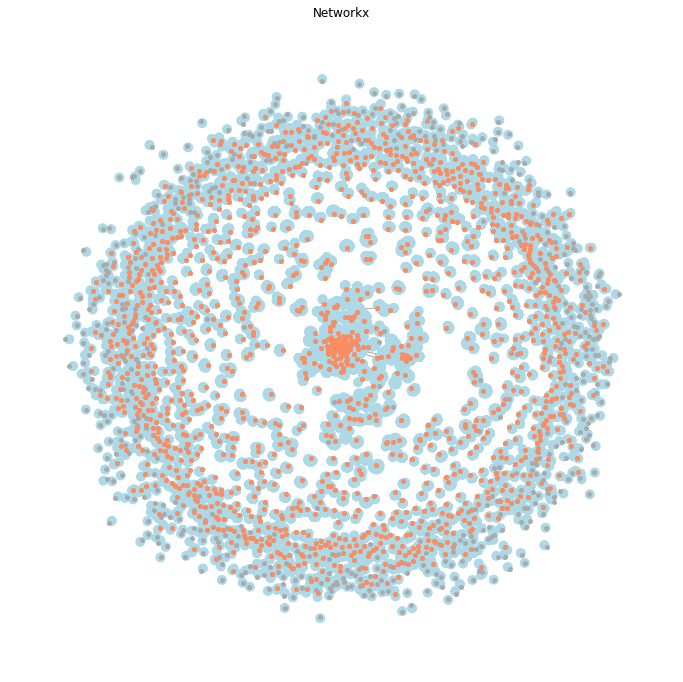

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# 1. Create the graph
g = nx.from_pandas_edgelist(df_enriched, source='Provider', target='AttendingPhysician') 

# 2. Create a layout for our nodes 
layout = nx.spring_layout(g,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(g, layout, edge_color='#AAAAAA')

AttendingPhysician = [node for node in g.nodes() if node in df_enriched.AttendingPhysician.unique()]
size = [g.degree(node) * 80 for node in g.nodes() if node in df_enriched.AttendingPhysician.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=AttendingPhysician, node_size=size, node_color='lightblue')

Provider = [node for node in g.nodes() if node in df_enriched.Provider.unique()]
nx.draw_networkx_nodes(g, layout, nodelist=Provider, node_size=15, node_color='#AAAAAA')

high_degree_people = [node for node in g.nodes() if node in df_enriched.Provider.unique() and g.degree(node) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=high_degree_people, node_size=15, node_color='#fc8d62')

AttendingPhysician_dict = dict(zip(AttendingPhysician, AttendingPhysician))
# nx.draw_networkx_labels(g, layout)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Networkx")

# 5. Tell matplotlib to show it
plt.show()

In [ ]:
G.nodes()

NodeView(('PRV55912', 'PHY390922', 'PHY349293', 'PHY334706', 'PHY390614', 'PHY380413', 'PHY418191', 'PHY318892', 'PHY319720', 'PHY340849', 'PHY410728', 'PHY414999', 'PHY410835', 'PHY361763', 'PHY333901', 'PHY393882', 'PHY339551', 'PHY354336', 'PHY384397', 'PHY416660', 'PHY403495', 'PHY330172', 'PHY429166', 'PHY320873', 'PHY370861', 'PHY368401', 'PHY387346', 'PHY335210', 'PHY390043', 'PHY399908', 'PHY420794', 'PHY400663', 'PHY382830', 'PHY323689', 'PHY425136', 'PHY431474', 'PHY429928', 'PHY352158', 'PRV55907', 'PHY318495', 'PHY369014', 'PHY328529', 'PHY391371', 'PHY376827', 'PHY346515', 'PHY348866', 'PHY424658', 'PHY426156', 'PHY324847', 'PHY348860', 'PHY329595', 'PHY401871', 'PHY365165', 'PHY415764', 'PHY345209', 'PHY377939', 'PHY373938', 'PHY339058', 'PHY424174', 'PHY351702', 'PHY344050', 'PHY373531', 'PHY397793', 'PHY409279', 'PHY343041', 'PHY406251', 'PHY373044', 'PHY432761', 'PHY375412', 'PHY363806', 'PHY342738', 'PHY337037', 'PHY388919', 'PHY331543', 'PRV56046', 'PHY372395', 'PHY3

In [ ]:
G.edges()

EdgeView([('PRV55912', 'PHY390922'), ('PRV55912', 'PHY349293'), ('PRV55912', 'PHY334706'), ('PRV55912', 'PHY390614'), ('PRV55912', 'PHY380413'), ('PRV55912', 'PHY418191'), ('PRV55912', 'PHY318892'), ('PRV55912', 'PHY319720'), ('PRV55912', 'PHY340849'), ('PRV55912', 'PHY410728'), ('PRV55912', 'PHY414999'), ('PRV55912', 'PHY410835'), ('PRV55912', 'PHY361763'), ('PRV55912', 'PHY333901'), ('PRV55912', 'PHY393882'), ('PRV55912', 'PHY339551'), ('PRV55912', 'PHY354336'), ('PRV55912', 'PHY384397'), ('PRV55912', 'PHY416660'), ('PRV55912', 'PHY403495'), ('PRV55912', 'PHY330172'), ('PRV55912', 'PHY429166'), ('PRV55912', 'PHY320873'), ('PRV55912', 'PHY370861'), ('PRV55912', 'PHY368401'), ('PRV55912', 'PHY387346'), ('PRV55912', 'PHY335210'), ('PRV55912', 'PHY390043'), ('PRV55912', 'PHY399908'), ('PRV55912', 'PHY420794'), ('PRV55912', 'PHY400663'), ('PRV55912', 'PHY382830'), ('PRV55912', 'PHY323689'), ('PRV55912', 'PHY425136'), ('PRV55912', 'PHY431474'), ('PRV55912', 'PHY429928'), ('PRV55912', 'PHY3

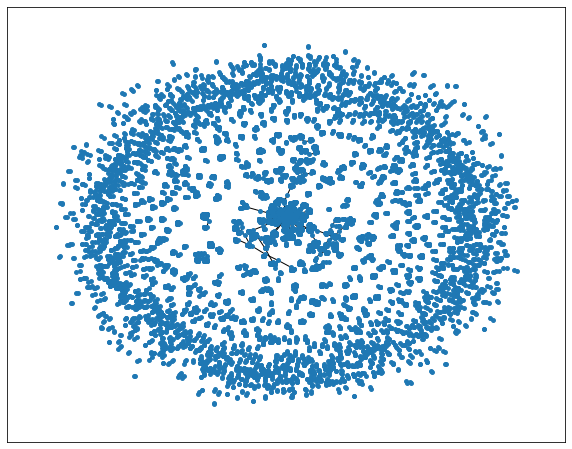

In [ ]:
plt.figure(figsize=(10, 8))
nx.draw_networkx(G,with_labels=False, font_weight='bold', node_size=15, font_size=8)

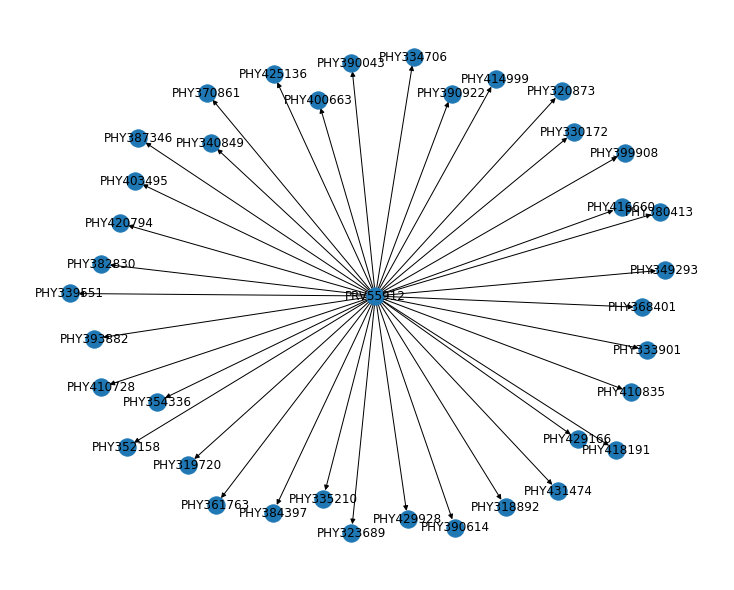

In [ ]:
plt.figure(figsize=(10, 8))
c=nx.bfs_tree(G,source='PRV55912')
nx.draw(c,with_labels=True)

In [ ]:
df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
1,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,...,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,Yes
2,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,...,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,Yes
3,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,...,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,Yes
4,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,2009-01-08,...,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE156181,CLM57017,2009-06-24,2009-07-01,PRV55706,12000,PHY319644,PHY319644,PHY403799,2009-06-24,...,1985,0414,NaN,9955.0,NaN,NaN,NaN,NaN,NaN,No
40470,BENE156872,CLM67045,2009-09-06,2009-09-13,PRV51572,5000,PHY407588,PHY311768,PHY311768,2009-09-06,...,41401,2639,NaN,3326.0,NaN,NaN,NaN,NaN,NaN,No
40471,BENE157414,CLM76036,2009-11-15,2009-11-23,PRV55688,14000,PHY409302,NaN,NaN,2009-11-15,...,V0481,2761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
40472,BENE158281,CLM35143,2009-01-23,2009-01-23,PRV56485,10000,PHY367360,PHY367360,NaN,2009-01-23,...,2866,NaN,NaN,9390.0,NaN,NaN,NaN,NaN,NaN,No


In [ ]:
pip install igraph

In [ ]:
from igraph import *

G = Graph.DataFrame(df_enriched[[source,target]])
# G = Graph.DataFrame(df[[source,target]], directed=False)
# computing the clustering
communities = G.community_infomap()
                    # G.community_multilevel()
                    # G.community_infomap()
                    # G.community_walktrap()

# summary of the clustering
communities.summary()
# ex: 'Clustering with y elements and n clusters'

# get the cluster of each node
clusters = {n: c for n,c in zip(G.vs["name"], communities.membership)}
figure(figsize=(10, 8))
nx.draw(clusters,with_labels=False, font_weight='bold', node_size=15, font_size=8)